# Yelp Sentiment Analysis Project

## Yelp Data EDA

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
base_path = '/content/drive/Shareddrives/App Domains Group Project/Yelp Data/'
json_files = {
    'review': 'yelp_academic_dataset_review.json'
}
chunks = pd.read_json(base_path + json_files['review'], lines=True, chunksize=100000)
df = next(chunks).sample(100000, random_state=42)

df.info()
df.describe()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 75721 to 15795
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    100000 non-null  object        
 1   user_id      100000 non-null  object        
 2   business_id  100000 non-null  object        
 3   stars        100000 non-null  int64         
 4   useful       100000 non-null  int64         
 5   funny        100000 non-null  int64         
 6   cool         100000 non-null  int64         
 7   text         100000 non-null  object        
 8   date         100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 7.6+ MB


,stars,useful,funny,cool,date
count,100000.000000,100000.000000,100000.000000,100000.000000,100000
mean,3.842910,0.898980,0.257180,0.347030,2015-05-02 14:36:08.625299968
min,1.000000,0.000000,0.000000,0.000000,2005-03-01 17:47:15
25%,3.000000,0.000000,0.000000,0.000000,2013-12-07 13:33:34.750000128
50%,4.000000,0.000000,0.000000,0.000000,2015-09-26 23:21:59.500000
75%,5.000000,1.000000,0.000000,0.000000,2017-04-08 12:26:05.249999872
max,5.000000,320.000000,98.000000,49.000000,2018-10-04 18:22:35
std,1.354729,2.205186,1.010212,1.066382,NaN


In [ ]:
df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
75721,MhKsttHvo3deXn4qM0-PFw,ecrYpAcwE22gWVsWoNvthQ,pqe1pCQx--uybdm6EQ8AqQ,3,0,0,0,I love elevation burger but they need to clean...,2016-01-06 21:32:21
80184,oakWLs2eYhIHA0KucrRaEA,-psFb4sFsOm0oRLY2Kye0A,AdT6vMVYy2uFFfnYbWoAsw,5,0,0,0,This is by far the best pizza place in Henders...,2015-05-17 00:43:46
19864,U5QAKIYquWGtZPqkw52wTQ,IoS8IZai5Yfa3ULgO1ktKw,Ix9p19oZJOdaIGjU9lElyA,2,1,0,0,I've heard a lot about Five Guys for years and...,2012-04-29 01:40:46
76699,nAeBofdKl-1GQiPl7WJb1Q,VhcRO_eyARVDRKvrLLJuCQ,GBTPC53ZrG1ZBY3DT8Mbcw,5,0,0,0,"Rich and Kenny were awesome. Hilarious guys, a...",2018-08-15 02:44:18
92991,MP6eIyOlsbBq561crfj15w,z04JR9Gt26vIQHk83PPWBw,PY9GRfzr4nTZeINf346QOw,5,0,0,0,I LOVE THIS PLACE! In the off season the rooms...,2012-01-11 02:58:22


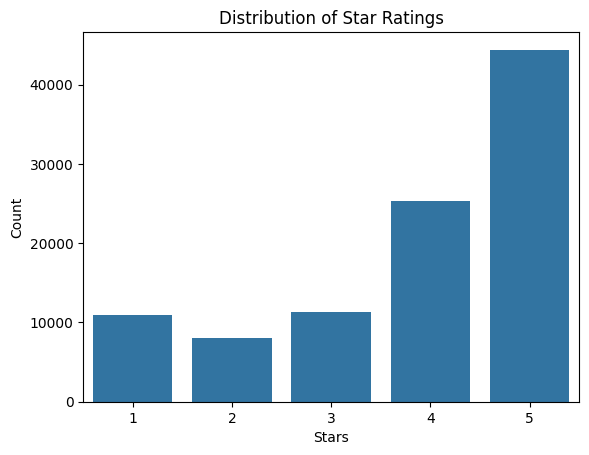

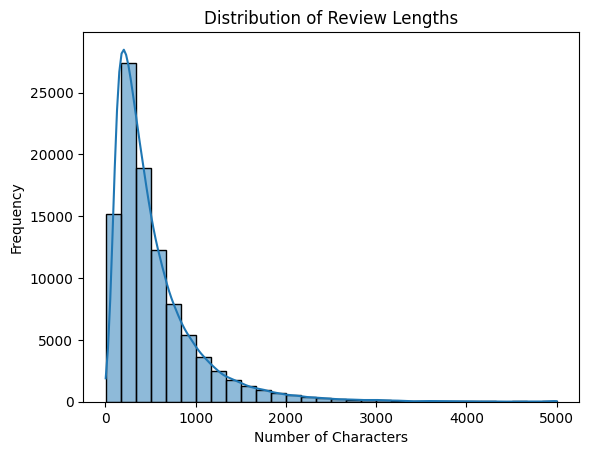

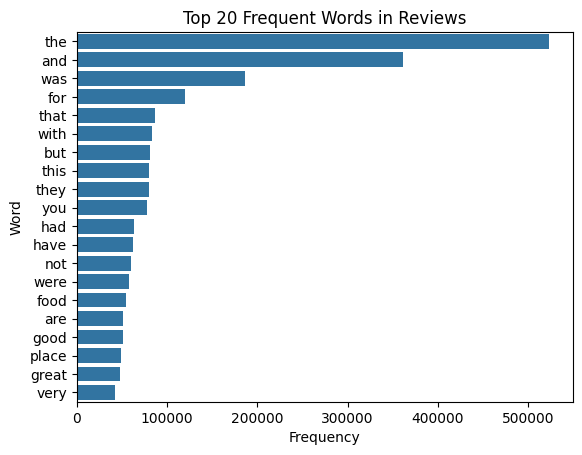

In [ ]:
# Distribution of Star Ratings
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='stars', data=df)
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

# Review Length Analysis
df['review_length'] = df['text'].apply(len)

sns.histplot(df['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')
plt.show()

# Top Frequent Words
from collections import Counter
import re

# Simple tokenization and stopword removal
words = df['text'].str.lower().str.cat(sep=' ')
words = re.findall(r'\b[a-z]{3,}\b', words)  # words with 3+ letters
common_words = Counter(words).most_common(20)

# Plot
top_words, counts = zip(*common_words)
sns.barplot(x=list(counts), y=list(top_words))
plt.title("Top 20 Frequent Words in Reviews")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

# Yelp Sentiment Analysis


 BoW + LogisticRegression
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      3782
           1       0.95      0.98      0.96     13946

    accuracy                           0.94     17728
   macro avg       0.93      0.90      0.91     17728
weighted avg       0.94      0.94      0.94     17728



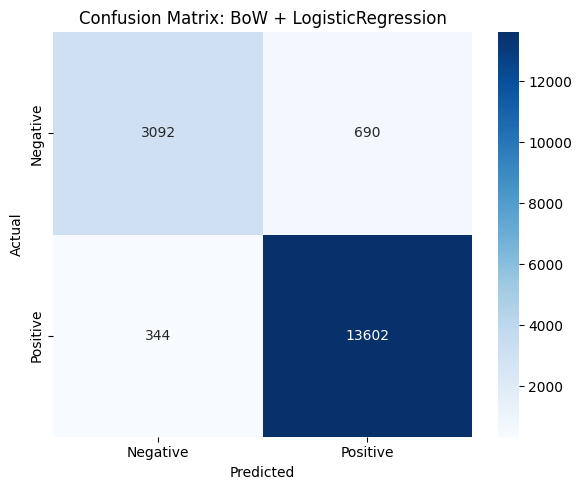

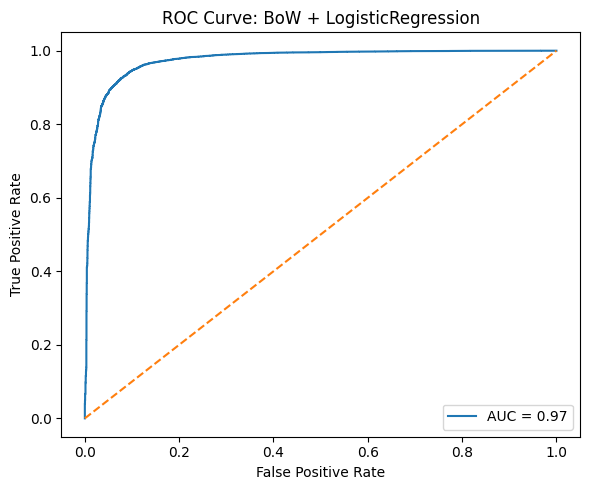


 BoW + SVM
              precision    recall  f1-score   support

           0       0.89      0.82      0.85      3782
           1       0.95      0.97      0.96     13946

    accuracy                           0.94     17728
   macro avg       0.92      0.90      0.91     17728
weighted avg       0.94      0.94      0.94     17728



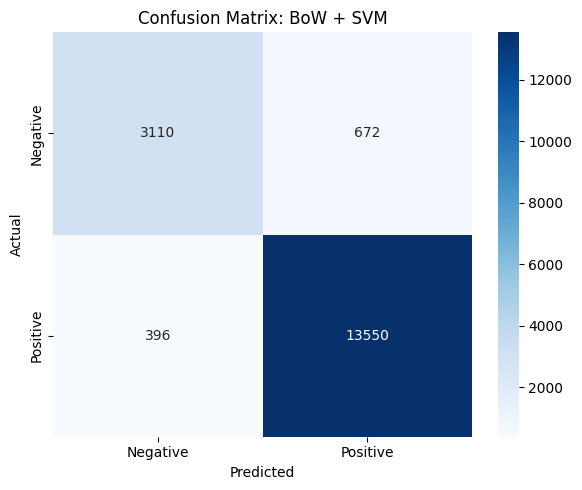

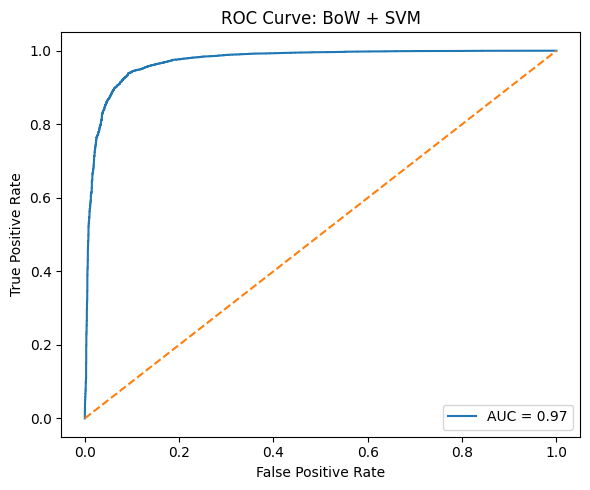


 BoW + RandomForest
              precision    recall  f1-score   support

           0       0.96      0.37      0.53      3782
           1       0.85      1.00      0.92     13946

    accuracy                           0.86     17728
   macro avg       0.91      0.68      0.72     17728
weighted avg       0.88      0.86      0.84     17728



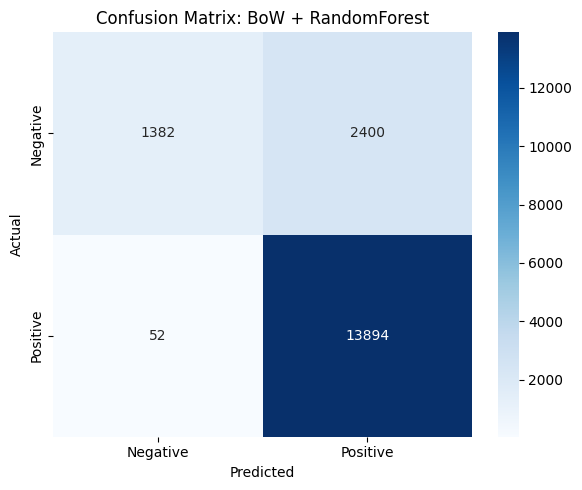

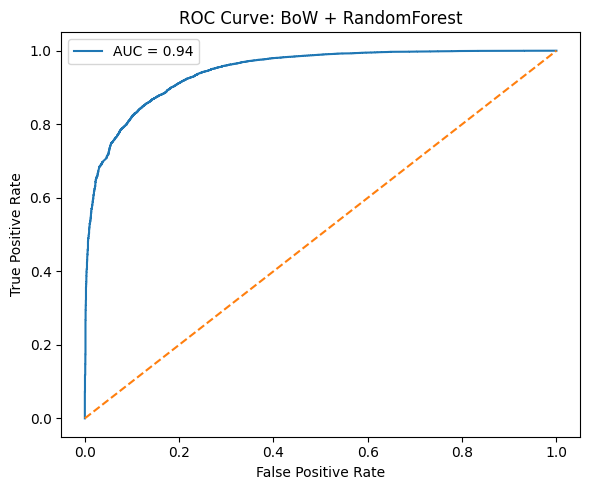


 TF-IDF + LogisticRegression
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      3782
           1       0.95      0.98      0.96     13946

    accuracy                           0.94     17728
   macro avg       0.93      0.90      0.91     17728
weighted avg       0.94      0.94      0.94     17728



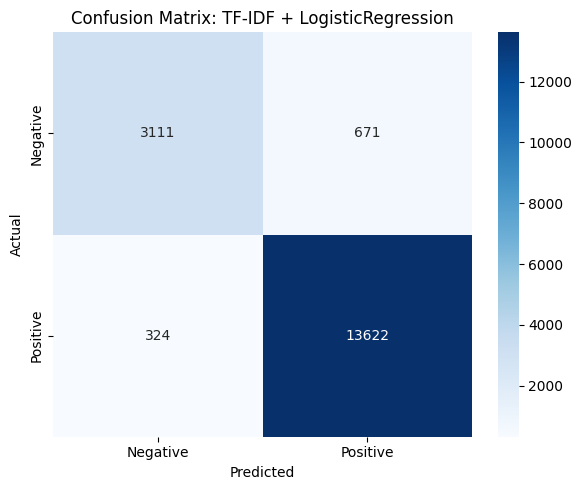

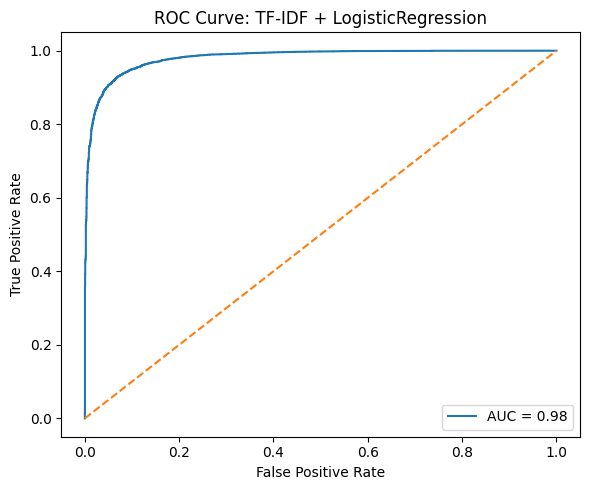


 TF-IDF + SVM
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      3782
           1       0.95      0.98      0.96     13946

    accuracy                           0.94     17728
   macro avg       0.93      0.90      0.91     17728
weighted avg       0.94      0.94      0.94     17728



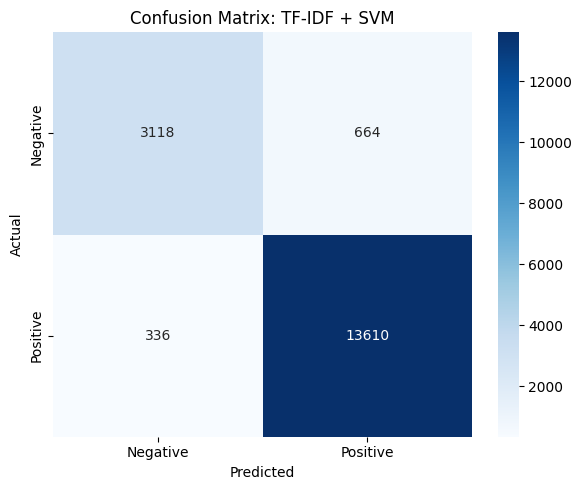

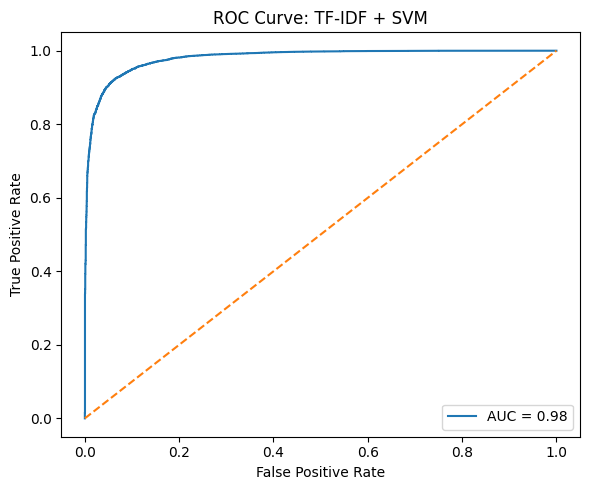


 TF-IDF + RandomForest
              precision    recall  f1-score   support

           0       0.96      0.36      0.52      3782
           1       0.85      1.00      0.92     13946

    accuracy                           0.86     17728
   macro avg       0.91      0.68      0.72     17728
weighted avg       0.88      0.86      0.83     17728



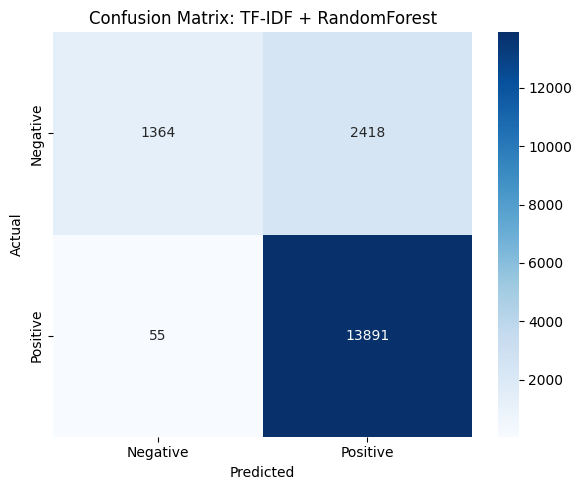

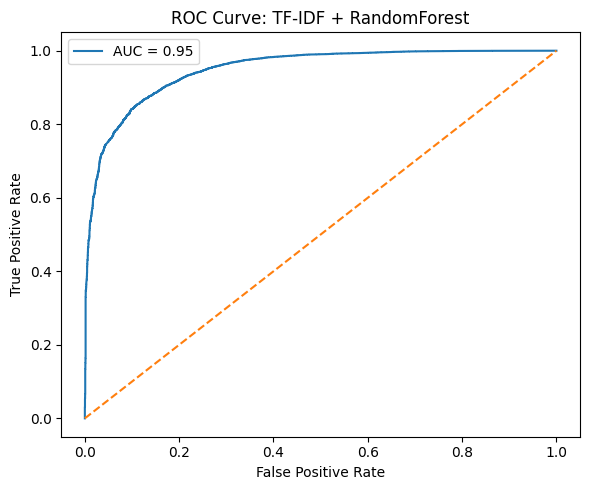


 n-Gram TF-IDF + LogisticRegression
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      3782
           1       0.95      0.98      0.96     13946

    accuracy                           0.94     17728
   macro avg       0.93      0.90      0.91     17728
weighted avg       0.94      0.94      0.94     17728



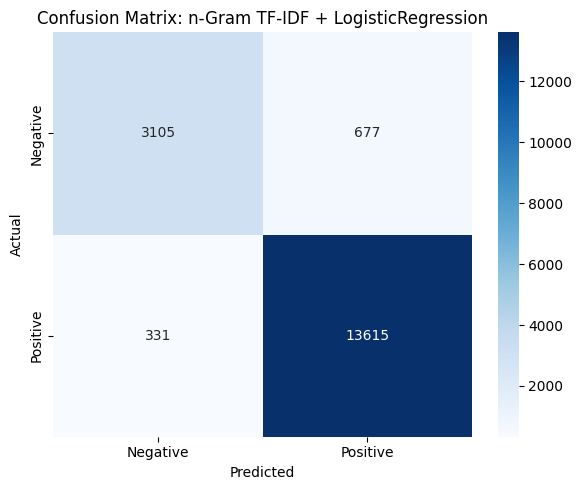

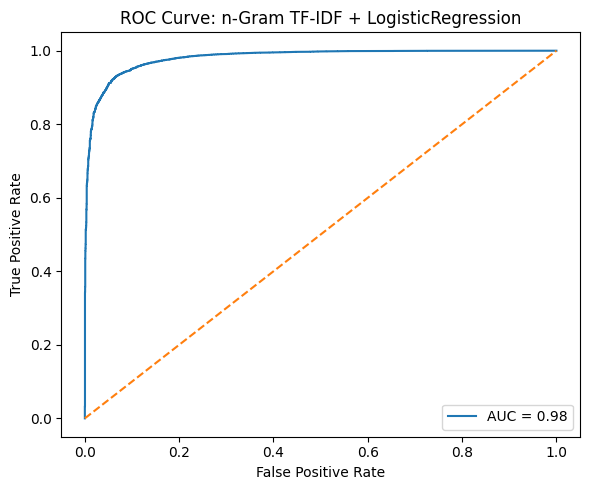


 n-Gram TF-IDF + SVM
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      3782
           1       0.95      0.98      0.96     13946

    accuracy                           0.94     17728
   macro avg       0.93      0.90      0.91     17728
weighted avg       0.94      0.94      0.94     17728



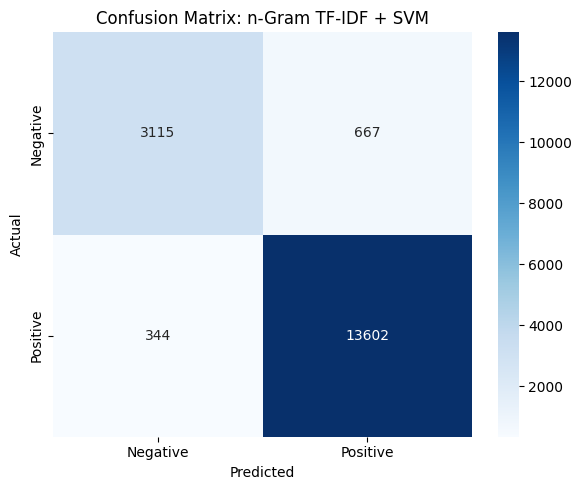

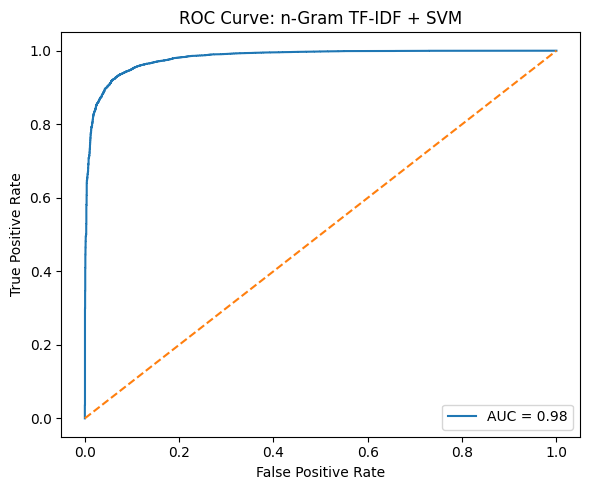


 n-Gram TF-IDF + RandomForest
              precision    recall  f1-score   support

           0       0.96      0.38      0.54      3782
           1       0.86      1.00      0.92     13946

    accuracy                           0.86     17728
   macro avg       0.91      0.69      0.73     17728
weighted avg       0.88      0.86      0.84     17728



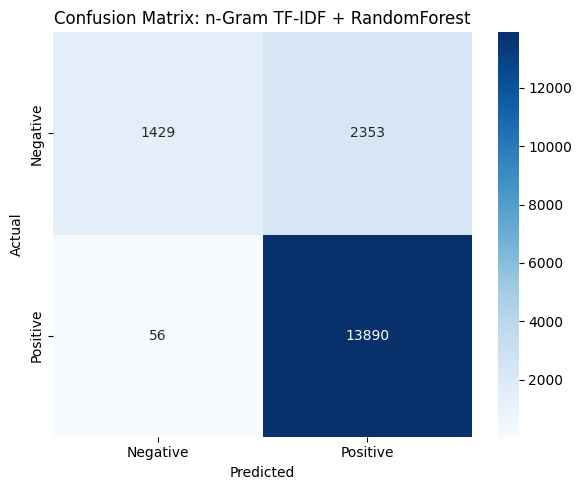

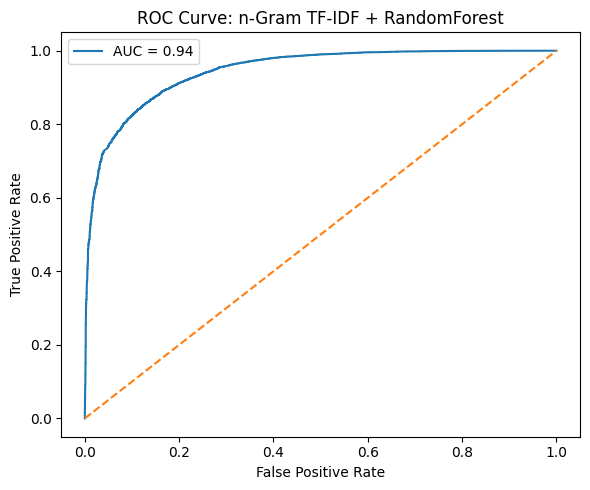

Summary of All Models:
      Vectorizer               Model  Accuracy  Precision    Recall  F1 Score  \
3         TF-IDF  LogisticRegression  0.943874   0.953054  0.976768  0.964765   
4         TF-IDF                 SVM  0.943592   0.953482  0.975907  0.964564   
6  n-Gram TF-IDF  LogisticRegression  0.943141   0.952631  0.976266  0.964303   
7  n-Gram TF-IDF                 SVM  0.942972   0.953255  0.975333  0.964168   
0            BoW  LogisticRegression  0.941674   0.951721  0.975333  0.963383   
1            BoW                 SVM  0.939756   0.952749  0.971605  0.962085   
8  n-Gram TF-IDF        RandomForest  0.864113   0.855138  0.995985  0.920203   
2            BoW        RandomForest  0.861688   0.852707  0.996271  0.918915   
5         TF-IDF        RandomForest  0.860503   0.851738  0.996056  0.918261   

    ROC AUC  
3  0.980868  
4  0.980787  
6  0.981147  
7  0.981137  
0  0.974700  
1  0.971904  
8  0.944613  
2  0.944408  
5  0.948323  


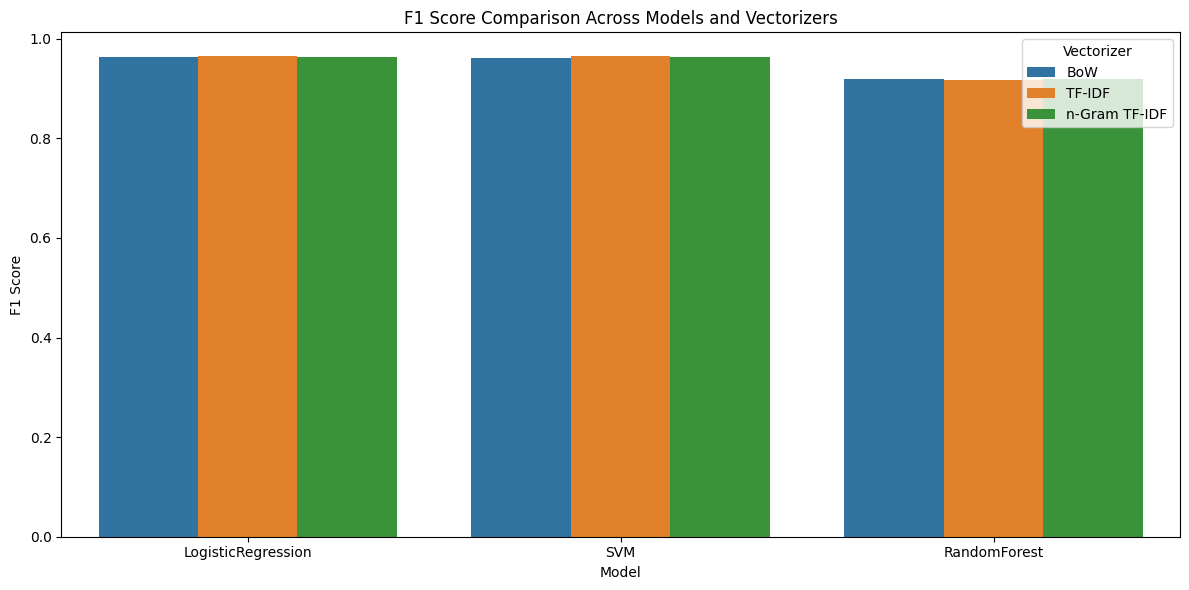

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             roc_auc_score, confusion_matrix, classification_report,
                             roc_curve, auc)
from joblib import parallel_backend
import warnings
warnings.filterwarnings("ignore")

# ------------------------
# 1. Data Preprocessing
# ------------------------
def preprocess(df):
    df = df[df['stars'].isin([1, 2, 4, 5])].copy()
    df['sentiment'] = df['stars'].apply(lambda x: 1 if x >= 4 else 0)
    df['text'] = df['text'].fillna('').astype(str)
    return df[['text', 'sentiment']]

# ------------------------
# 2. Vectorizer Options
# ------------------------
def get_vectorizers():
    return {
        'BoW': CountVectorizer(max_features=2000, stop_words='english'),
        'TF-IDF': TfidfVectorizer(max_features=2000, stop_words='english'),
        'n-Gram TF-IDF': TfidfVectorizer(ngram_range=(1, 2), max_features=2000, stop_words='english')
    }

# ------------------------
# 3. Models and Parameters
# ------------------------
def get_models_and_params():
    models = {
        'LogisticRegression': LogisticRegression(max_iter=1000, solver='saga', n_jobs=-1),
        'SVM': LinearSVC(max_iter=1000),
        'RandomForest': RandomForestClassifier(n_jobs=-1)
    }

    param_grids = {
        'LogisticRegression': {'C': [0.1, 1]},
        'SVM': {'C': [0.1, 1]},
        'RandomForest': {'n_estimators': [50, 100], 'max_depth': [10, 20]}
    }

    return models, param_grids

# ------------------------
# 4. Evaluation
# ------------------------
def evaluate(y_test, y_pred, y_proba=None):
    metrics = {}
    metrics['accuracy'] = accuracy_score(y_test, y_pred)
    metrics['precision'] = precision_score(y_test, y_pred, zero_division=0)
    metrics['recall'] = recall_score(y_test, y_pred, zero_division=0)
    metrics['f1'] = 2 * (metrics['precision'] * metrics['recall']) / (metrics['precision'] + metrics['recall'] + 1e-9)
    metrics['report'] = classification_report(y_test, y_pred)
    metrics['confusion'] = confusion_matrix(y_test, y_pred)

    if y_proba is not None:
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        metrics['roc_auc'] = auc(fpr, tpr)
        metrics['fpr'] = fpr
        metrics['tpr'] = tpr
    else:
        metrics['roc_auc'] = None

    return metrics

# ------------------------
# 5. Visualization
# ------------------------
def plot_results(metrics, title):
    cm = metrics['confusion']
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f"Confusion Matrix: {title}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    if metrics['roc_auc']:
        plt.figure(figsize=(6, 5))
        plt.plot(metrics['fpr'], metrics['tpr'], label=f"AUC = {metrics['roc_auc']:.2f}")
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.title(f"ROC Curve: {title}")
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.legend()
        plt.tight_layout()
        plt.show()

# ------------------------
# 6. Main Execution
# ------------------------
def run_pipeline(df):
    df_clean = preprocess(df)
    X_train, X_test, y_train, y_test = train_test_split(df_clean['text'], df_clean['sentiment'], test_size=0.2, random_state=42, stratify=df_clean['sentiment'])

    vectorizers = get_vectorizers()
    models, param_grids = get_models_and_params()
    summary = []

    for vec_name, vectorizer in vectorizers.items():
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)

        for model_name, model in models.items():
            print(f"\n {vec_name} + {model_name}")
            clf = GridSearchCV(model, param_grids[model_name], cv=3, scoring='f1', n_jobs=-1)
            with parallel_backend('threading'):
                clf.fit(X_train_vec, y_train)

            best_model = clf.best_estimator_
            y_pred = best_model.predict(X_test_vec)

            if hasattr(best_model, 'decision_function'):
                y_score = best_model.decision_function(X_test_vec)
                y_score = (y_score - y_score.min()) / (y_score.max() - y_score.min() + 1e-9)
            elif hasattr(best_model, 'predict_proba'):
                y_score = best_model.predict_proba(X_test_vec)[:, 1]
            else:
                y_score = None

            metrics = evaluate(y_test, y_pred, y_score)
            print(metrics['report'])
            plot_results(metrics, f"{vec_name} + {model_name}")

            summary.append({
                'Vectorizer': vec_name,
                'Model': model_name,
                'Accuracy': metrics['accuracy'],
                'Precision': metrics['precision'],
                'Recall': metrics['recall'],
                'F1 Score': metrics['f1'],
                'ROC AUC': metrics['roc_auc']
            })

    results_df = pd.DataFrame(summary)
    print("Summary of All Models:")
    print(results_df.sort_values(by='F1 Score', ascending=False))
    plt.figure(figsize=(12, 6))
    sns.barplot(data=results_df, x='Model', y='F1 Score', hue='Vectorizer')
    plt.title("F1 Score Comparison Across Models and Vectorizers")
    plt.tight_layout()
    plt.show()

# ------------------------
# Usage
# ------------------------
run_pipeline(df)

